# Financial Concepts

In this notebook we'll go over some of the core concepts in finance. We'll start with the basics of time value of money and then move on to more advanced concepts like the Black-Scholes model and the CAPM.

### Import Libraries

In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Time Value of Money

Time value of money is the idea that money today is worth more than money in the future. This is because money today can be invested and earn interest, while money in the future cannot. The time value of money is calculated using the following formula: 

$$
\begin{align}
FV &= PV \cdot (1 + r)^n \\
\end{align}
$$

Where $FV$ is the future value, $PV$ is the present value, $r$ is the interest rate, and $n$ is the number of periods.

Let's say we have $1000 today and we want to know how much it will be worth in 10 years. We'll assume that the interest rate is 5% per year. We can calculate the future value using the formula above: 

$$
\begin{align}
FV &= PV \cdot (1 + r)^n \\
FV &= 1000 \cdot (1 + 0.05)^{10} \\
FV &= 1628.78
\end{align}
$$

So, $1000 today will be worth $1628.78 in 10 years.

Growth and Rate of Return are two concepts that are ubiquitous throughout the financial world. Recall that the cumulative returns from investing $100 in an asset that grows at 5% per year, over a 2 year period can be calculated as follows:

In [2]:
future_value = 100 * ((1 +0.06)**30 )
print(f"Future Value of Investment: {round(future_value, 2)}")

Future Value of Investment: 574.35


**Compound Growth** is the idea that the returns from an investment can be compounded over time. This means that the returns from an investment can be reinvested and earn returns themselves. This is a powerful concept because it allows investors to grow their wealth exponentially.

In [3]:
# Predefined variables
initial_investment = 100
growth_periods = 30
growth_rate = 0.06

# Calculate the value for the investment compounded once per year
compound_periods_1 = 1
investment_1 = initial_investment*(1 + growth_rate / compound_periods_1)**(compound_periods_1*growth_periods)
print("Investment 1: " + str(round(investment_1, 2)))

# Calculate the value for the investment compounded quarterly
compound_periods_2 = 4
investment_2 = initial_investment*(1 + growth_rate / compound_periods_2)**(compound_periods_2*growth_periods)
print("Investment 2: " + str(round(investment_2, 2)))

# Calculate the value for the investment compounded monthly
compound_periods_3 = 12
investment_3 = initial_investment*(1 + growth_rate / compound_periods_3)**(compound_periods_3*growth_periods)
print("Investment 3: " + str(round(investment_3, 2)))

Investment 1: 574.35
Investment 2: 596.93
Investment 3: 602.26


**Discount factors and depreciation** are two concepts that are used to calculate the present value of future cash flows. The present value of a future cash flow is the amount of money that would need to be invested today to generate that cash flow in the future. The present value of a future cash flow is calculated using the following formula:

$$
\begin{align}
PV &= \frac{CF}{(1 + r)^n} \\
\end{align}
$$

Where $PV$ is the present value, $CF$ is the cash flow, $r$ is the interest rate, and $n$ is the number of periods.

In [4]:
# Calculate the future value
initial_investment = 100
growth_rate = -0.05
growth_periods = 10
future_value = initial_investment*(1 + growth_rate)**(growth_periods)
print("Future value: " + str(round(future_value, 2)))

# Calculate the discount factor
discount_factor = 1/((1 + growth_rate)**(growth_periods))
print("Discount factor: " + str(round(discount_factor, 2)))

# Derive the initial value of the investment
initial_investment_again = future_value * discount_factor
print("Initial value: " + str(round(initial_investment_again, 2)))

Future value: 59.87
Discount factor: 1.67
Initial value: 100.0


### Present and Future Value


In [5]:
# Calculate investment_1
investment_1 = npf.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Note that the present value returned is negative, so we multiply the result by -1
print("Investment 1 is worth " + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)
print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's dollars")

Investment 1 is worth 6418.62 in today's dollars
Investment 2 is worth 6139.13 in today's dollars


In [6]:
# Calculate investment_1
investment_1 = npf.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print(f"Investment 1 will yield a total of ${round(investment_1, 2):,} in 15 years")

# Calculate investment_2
investment_2 = npf.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print(f"Investment 2 will yield a total of ${round(investment_2, 2):,} in 15 years")

Investment 1 will yield a total of $20,789.28 in 15 years
Investment 2 will yield a total of $31,721.69 in 15 years


In [7]:
# Calculate investment_1
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print(f"Investment 1 will yield a total of ${round(investment_1, 2)} in 10 years")

# Calculate investment_2
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print(f"After adjusting for inflation, investment 1 is worth ${round(-investment_1_discounted, 2)} in today's dollars")

Investment 1 will yield a total of $21589.25 in 10 years
After adjusting for inflation, investment 1 is worth $16064.43 in today's dollars


### Net Present Value and cash flows

Net Present Value (NPV) is the difference between the present value of cash inflows and the present value of cash outflows. NPV is calculated using the following formula:

$$
\begin{align}
NPV &= \sum_{i=1}^{n} \frac{CF_i}{(1 + r)^i} \\
\end{align}
$$

Where $CF_i$ is the cash flow in period $i$ and $r$ is the interest rate.

In [8]:
# Predefined array of cash flows
cash_flows = np.array([100, 100, 100, 100, 100])

# Calculate investment_1
investment_1 = npf.npv(rate=0.03, values=cash_flows)
print(f"Investment 1's net present value is ${round(investment_1, 2)} in today's dollars")

# Calculate investment_2
investment_2 = npf.npv(rate=0.05, values=cash_flows)
print(f"Investment 2's net present value is ${round(investment_2, 2)} in today's dollars")

# Calculate investment_3
investment_3 = npf.npv(rate=0.07, values=cash_flows)
print(f"Investment 3's net present value is ${round(investment_3, 2)} in today's dollars")

Investment 1's net present value is $471.71 in today's dollars
Investment 2's net present value is $454.6 in today's dollars
Investment 3's net present value is $438.72 in today's dollars


In [9]:
# Create an array of cash flows for project 1
cash_flows_1 = np.array([-250, 100, 200, 300, 400])

# Create an array of cash flows for project 2
cash_flows_2 = np.array([-250, 300, -250, 300, 300])

# Calculate the net present value of project 1
investment_1 = npf.npv(rate=0.03, values=cash_flows_1)
print(f"The net present value of Investment 1 is worth ${round(investment_1, 2)} in today's dollars")

# Calculate the net present value of project 2
investment_2 = npf.npv(rate=0.03, values=cash_flows_2)
print(f"The net present value of Investment 2 is worth ${round(investment_2, 2)} in today's dollars")

The net present value of Investment 1 is worth $665.54 in today's dollars
The net present value of Investment 2 is worth $346.7 in today's dollars


**Example of dimishing cash flows**

In [10]:
# Calculate investment_1
investment_1 = npf.pv(rate=0.03, nper=30, pmt=0, fv=100)
print(f"Investment 1 is worth ${round(-investment_1, 2)} in today's dollars")

# Calculate investment_2
investment_2 = npf.pv(rate=0.03, nper=50, pmt=0, fv=100)
print(f"Investment 2 is worth ${round(-investment_2, 2)} in today's dollars")

# Calculate investment_3
investment_3 = npf.pv(rate=0.03, nper=100, pmt=0, fv=100)
print(f"Investment 3 is worth ${round(-investment_3, 2)} in today's dollars")

Investment 1 is worth $41.2 in today's dollars
Investment 2 is worth $22.81 in today's dollars
Investment 3 is worth $5.2 in today's dollars


## Capital Budgeting

Capital budgeting is the process of determining whether or not a project should be undertaken. There are two main methods of capital budgeting: **payback period** and **net present value**. 

Project proposals and cash flows projections
Your project managers have projected the cash flows for each of the proposals.

Project 1 provides higher short term cash flows, but Project 2 becomes more profitable over time.

The cash flow projections for both projects are as follows:

|Year	|Project 1	|Project 2|
|---|---|---|
|1	|-$1,000 (initial investment)	|-$1,000 (initial investment)|
|2	|$200 (cash flow)	|$150 (cash flow)|
|3	|$250	|$225|
|4	|$300	|$300|
|5	|$350	|$375|
|6	|$400	|$425|
|7	|$450	|$500|
|8	|$500	|$575|
|9	|$550	|$600|
|10	|$600	|$625|

Note: The projections are provided in thousands. For example, $1,000 = $1,000,000. We will use the smaller denominations to make everything easier to read. This is also commonly done in financial statements with thousands or even millions in order to represent millions or billions.

In [11]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-1000,200,250,300,350,400,450,500,550,600])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-1000,150,225,300,375,425,500,575,600,625])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

# Calculate the internal rate of return for Project 1
irr_project1 = npf.irr(cf_project1)
print(f"Project 1 IRR: {round(100*irr_project1, 2)}%")

# Calculate the internal rate of return for Project 2
irr_project2 = npf.irr(cf_project2)
print(f"Project 2 IRR: {round(100*irr_project2, 2)}%")

print("We'd pick Project 1 because it has a higher IRR")

Project 1 IRR: 28.92%
Project 2 IRR: 28.78%
We'd pick Project 1 because it has a higher IRR


### WACC and Cost of Capital

The weighted average cost of capital (WACC) is the cost of capital for a company. It is calculated using the following formula:

$$
\begin{align}
WACC &= \frac{E}{V} \cdot r_e + \frac{D}{V} \cdot r_d (1 - t) \\
\end{align}
$$

Where $E$ is the market value of equity, $V$ is the market value of the firm, $r_e$ is the cost of equity, $D$ is the market value of debt, $r_d$ is the cost of debt, and $t$ is the tax rate.

A simpler way to calculate the WACC is to use the following formula:

$$
\begin{align}
WACC &= r_e \cdot \frac{E}{V} + r_d \cdot \frac{D}{V} \\
\end{align}
$$

Where $E$ is the market value of equity, $V$ is the market value of the firm, $r_e$ is the cost of equity, $D$ is the market value of debt, and $r_d$ is the cost of debt.

### Cost of Equity

The cost of equity is the rate of return that investors require in order to invest in a company. The cost of equity is calculated using the following formula:

$$
\begin{align}
r_e &= r_f + \beta \cdot (r_m - r_f) \\
\end{align}
$$

Where $r_e$ is the cost of equity, $r_f$ is the risk-free rate, $\beta$ is the company's beta, $r_m$ is the market return, and $r_f$ is the risk-free rate.

**Debt and equity financing** </br> </br>
We were able to assume that your discount rate for the NPV calculation was solely based on a measure such as inflation.

Let's assume you are the CEO of a new company that has outstanding debt and financing costs, which you will have to adjust for.

We will use wacc as the discount rate for the NPV calculation.

Assume you take out a $1,000,000 loan to finance the project, which will be your company's only outstanding debt. This loan will represent 50% of your company's total financing of $2,000,000. The remaining funding comes from the market value of equity.The cost of debt financing can be estimated as the amount you will have to pay on a new loan. This can be estimated by looking at the interest rates of loans of similar sizes to similar companies, or could be based on previous loans your company may already have been issued.

The cost of equity financing can be estimated as the return on equity of similar companies. Calculating the return on equity is a simple accounting exercise, but all you need to know is that essentially, investors will require a rate of return that is close to what could be earned by a similar investment.

In [12]:
# Set the market value of debt
mval_debt = 1_000_000

# Set the market value of equity
mval_equity = 1_000_000

# Compute the total market value of your company's financing
mval_total = mval_debt + mval_equity

# Compute the proportion of your company's financing via debt
percent_debt = mval_debt / mval_total
print(f"Debt Financing: {round(100*percent_debt, 2)}%")

# Compute the proportion of your company's financing via equity
percent_equity = mval_equity / mval_total
print(f"Equity Financing: {round(100*percent_equity, 2)}%\n")

# Set the cost of equity
cost_equity = 0.18

# Set the cost of debt
cost_debt = 0.12

# Set the corporate tax rate
tax_rate = 0.35

# Calculate the WACC
wacc = (cost_equity*percent_equity) + (cost_debt*percent_debt*(1-tax_rate))
print(f"WACC: {round(100*wacc, 2)}%\n")

npv_project1 = npf.npv(rate=wacc, values=cf_project1)
print(f"Project 1 NPV: ${round(npv_project1, 2)}")

npv_project2 = npf.npv(rate=wacc, values=cf_project2)
print(f"Project 2 NPV: ${round(npv_project2, 2)}")

Debt Financing: 50.0%
Equity Financing: 50.0%

WACC: 12.9%

Project 1 NPV: $856073.18
Project 2 NPV: $904741.35


### Comparing two projects with different life spans

To compare two projects with different life spans, we can use Equivalent Annual Annuity (EAA) to convert the cash flows of the longer project into the same time period as the shorter project. We can then compare the two projects using the NPV method.

Two project with different lifespans
The board of the company has decided to go a different direction, involving slightly shorter term projects and lower initial investments.

Your project managers have come up with two new ideas, and projected the cash flows for each of the proposals.

Project 1 has a lifespan of 8 years, but Project 2 only has a lifespan of 7 years. Project 1 requires an initial investment of $700,000, but Project 2 only requires $400,000.

The cash flow projections for both projects are as follows:

|Year	|Project 1	|Project 2|
|---|---|---|
|1	|-$700 (initial investment)|	-$400 (initial investment)|
|2	|$100 (cash flow)	|$50 (cash flow)|
|3	|$150	|$100|
|4	|$200	|$150|
|5	|$250	|$200|
|6	|$300	|$250|
|7	|$350	|$300|
|8	|$400	|N/A|

In [13]:
# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-700, 100, 150, 200, 250, 300, 350, 400])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-400, 50, 100, 150, 200, 250, 300])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

# Calculate the IRR for Project 1
irr_project1 = npf.irr(cf_project1)
print(f"Project 1 IRR: {round(100*irr_project1, 2)}%")

# Calculate the IRR for Project 2
irr_project2 = npf.irr(cf_project2)
print(f"Project 2 IRR: {round(100*irr_project2, 2)}%\n")

# Set the wacc equal to 12.9%
wacc = 0.129

# Calculate the NPV for Project 1
npv_project1 = npf.npv(wacc, cf_project1)
print(f"Project 1 NPV: {round(npv_project1, 2)}")

# Calculate the NPV for Project 2
npv_project2 = npf.npv(wacc, cf_project2)
print(f"Project 2 NPV: {round(npv_project2, 2)}\n")

# Calculate the EAA for Project 1
eaa_project1 = npf.pmt(rate=wacc, nper=8, pv=-npv_project1, fv=0)
print(f"Project 1 EAA: {round(eaa_project1, 2)}")

# Calculate the EAA for Project 2
eaa_project2 = npf.pmt(rate=wacc, nper=7, pv=-npv_project2, fv=0)
print(f"Project 2 EAA: {round(eaa_project2, 2)}")

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%

Project 1 NPV: 302744.98
Project 2 NPV: 231228.39

Project 1 EAA: 62872.2
Project 2 EAA: 52120.61


## Mortgage Basics

Mortgages are loans that are secured by real estate. Mortgages are typically used to purchase a home, but can also be used to purchase other types of real estate. Mortgages are typically repaid over a period of 15 or 30 years, but can be repaid over any period of time. These are one of the most common types of loans in the United States.

You have decided to purchase a beautiful brownstone home in the $800,000 range. While you do have a considerable amount of cash on hand, you don't have enough to purchase the entire home outright, which means you will have to take the remaining balance out as a mortgage loan. From the sound of it, you'll have to put about 20% down up-front to a mortgage loan of that size.

This up-front payment is known as a down payment.

In [14]:
# Set the value of the home you are looking to buy
home_value = 8_000_00

# What percentage are you paying up-front?
down_payment_percent = 0.2

# Calculate the dollar value of the down payment
down_payment = home_value * down_payment_percent
print(f"Initial Down Payment: {int(down_payment)}")

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print(f"Mortgage Loan: {int(mortgage_loan)}")

Initial Down Payment: 160000
Mortgage Loan: 640000


**Calculating the monthly mortgage payment** </br> </br>
In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.

Now, since you will be paying a monthly mortgage, you will have to convert each of the parameters into their monthly equivalents. Be careful when adjusting the interest rate, which is compounding!

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

* `rate` = The periodic (monthly) interest rate
* `nper` = The number of payment periods (months) in the lifespan of the mortgage loan
* `pv` = The total value of the mortgage loan
You have been given a 30-year mortgage loan quote for your desired amount at 3.75%. The value of the `mortgage loan` is available as `mortgage_loan`.

The annual mortgage rate is available as `mortgage_rate`  

In [15]:
mortgage_rate = 0.0375

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1+mortgage_rate)**(1/12) - 1

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 30*12

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*npf.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print(f"Monthly Mortgage Payment:{round(periodic_mortgage_payment, 2)}")

Monthly Mortgage Payment:2941.13


**Calculating interest and principal payments** </br> </br>
Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

In [16]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print(f"Initial Interest Payment: {round(initial_interest_payment, 2)}")

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print(f"Initial Principal Payment: {round(initial_principal_payment, 2)}")

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


**Simulating periodic payments (I)** </br> </br>
You have all the tools you'll need to simulate the mortgage payments over time.

Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. This is important to determine how much you will gain from selling the home before paying off your mortgage, or to determine when your mortgage is underwater. But more on that later.

We will now write a simple program to calculate the interest and mortgage portions of each payment over time.

In [17]:
def print_payments(i, interest_payment, principal_payment, principal_remaining):
        print(f"Period {i}:")
        print(f"Interest Payment: {round(interest_payment, 2)}")
        print(f"Principal Payment: {round(principal_payment, 2)}")
        print(f"Principal Remaining: {round(principal_remaining[i], 2)}\n")

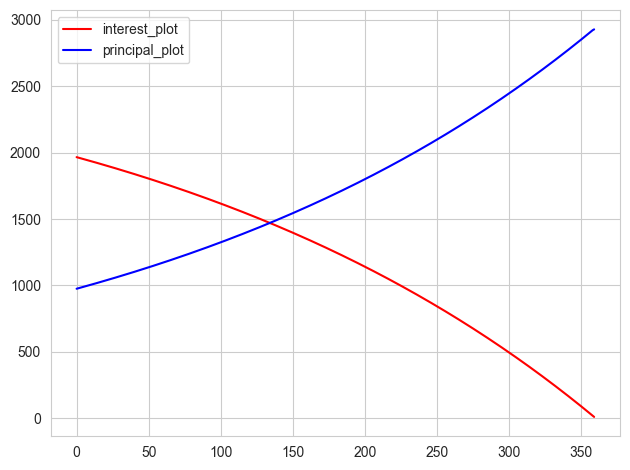

In [18]:
principal_remaining = np.zeros(mortgage_payment_periods)
interest_paid = np.zeros(mortgage_payment_periods)
principal_paid = np.zeros(mortgage_payment_periods)

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):  
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.legend(["interest_plot", "principal_plot"], loc=2)
plt.tight_layout()
plt.show()

## Equity and Forecasting

To calculate the percentage of home you actually own (**home equity**):

$$
\begin{align}
Percent Equity Owned_t = P_{Down} + \frac{E_{Cumulative,t}}{V_{Home}} \\
\end{align}
$$

[0.20121838 0.2024405  0.20366638 0.20489603 0.20612945 0.20736666
 0.20860768 0.2098525  0.21110115 0.21235364 0.21360998 0.21487017
 0.21613424 0.21740219 0.21867404 0.21994979 0.22122946 0.22251308
 0.22380063 0.22509214 0.22638761 0.22768706 0.22899051 0.23029796
 0.23160944 0.23292494 0.23424448 0.23556808 0.23689574 0.23822748
 0.23956331 0.24090325 0.2422473  0.24359549 0.24494781 0.2463043
 0.24766495 0.24902979 0.25039881 0.25177205 0.2531495  0.25453119
 0.25591711 0.2573073  0.25870176 0.2601005  0.26150354 0.26291089
 0.26432256 0.26573857 0.26715894 0.26858366 0.27001276 0.27144626
 0.27288416 0.27432649 0.27577324 0.27722444 0.27868009 0.28014021
 0.28160483 0.28307394 0.28454756 0.28602571 0.28750841 0.28899566
 0.29048749 0.29198389 0.29348489 0.2949905  0.29650074 0.29801563
 0.29953516 0.30105936 0.30258825 0.30412184 0.30566014 0.30720316
 0.30875093 0.31030345 0.31186074 0.31342281 0.31498969 0.31656138
 0.3181379  0.31971926 0.32130549 0.32289659 0.32449258 0.32609

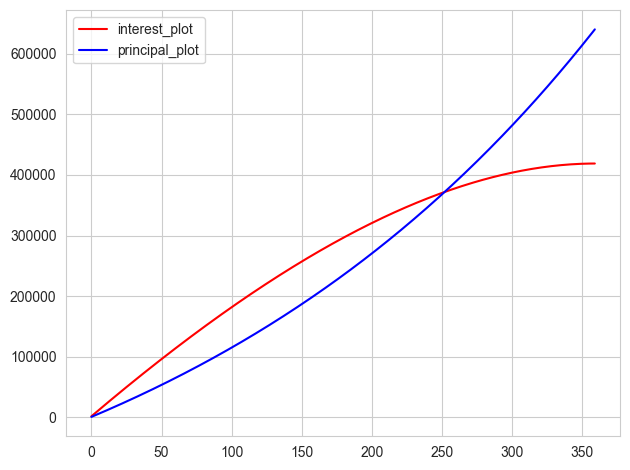

In [19]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.legend(["interest_plot", "principal_plot"], loc=2)
plt.tight_layout()
plt.show()

**Rising Housing Prices** </br> </br>

Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called `growth_array`.

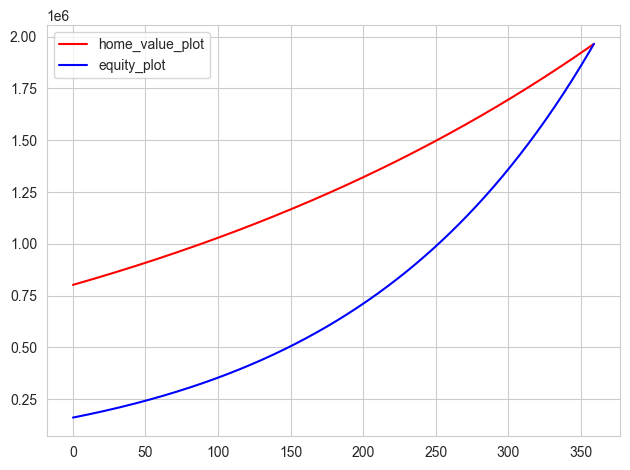

In [20]:
growth_array = np.ones(360)*0.0025

# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 + growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = home_value_forecast * cumulative_percent_owned

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
plt.legend(["home_value_plot", "equity_plot"], loc=2)
plt.tight_layout()
plt.show()

**Falling housing prices and underwater mortgages**

Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, we will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

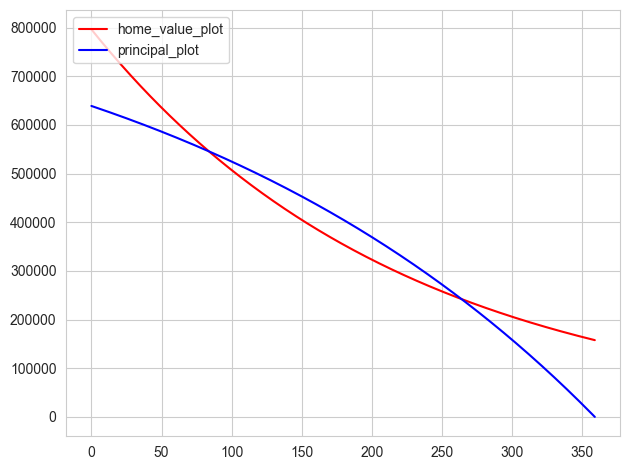

In [21]:
decline_array = np.ones(360)*-0.0045

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(["home_value_plot", "principal_plot"], loc=2)
plt.tight_layout()
plt.show()

## Budget Project Proposal

Lets walk through a scenario You just got a new job as an entry-level Data Scientist at a technology company in New York City with a decent starting salary of (enter any value) per year Unfortunately, after state and local taxes, you can expect to be sending roughly 30% back to the government each year. You will need to calculate your monthly take home pay after taxes in order to begin budgeting. Assume a tax rate and a base salary of $85,000.

In [22]:
# Enter Salary Amount
salary = int(input())
# Assume a tax rate
tax_rate = (int(input())/100)

salary_after_tax = salary * (1-tax_rate)
take_home_pay = salary_after_tax/12


In [24]:
# Enter your monthly rent
monthly_rent = int(input())

# Enter your daily food budget
daily_food_budget = int(input())

# Calculate your monthly food budget assuming 30 days per month
monthly_food_budget = daily_food_budget * 30

# Set your monthly entertainment budget
monthly_entertainment_budget = int(input())

# Allocate funds for unforeseen expenses, just in case
monthly_unforeseen_expenses = int(input())

In [25]:
# Next, calculate your total monthly expenses
monthly_expenses = monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
print(f"Monthly expenses: {round(monthly_expenses, 2)}")

# Finally, calculate your monthly take-home savings
monthly_savings = take_home_pay - monthly_expenses
print(f"Monthly savings: {round(monthly_savings, 2)}")

Monthly expenses: 2070
Monthly savings: -2070.0


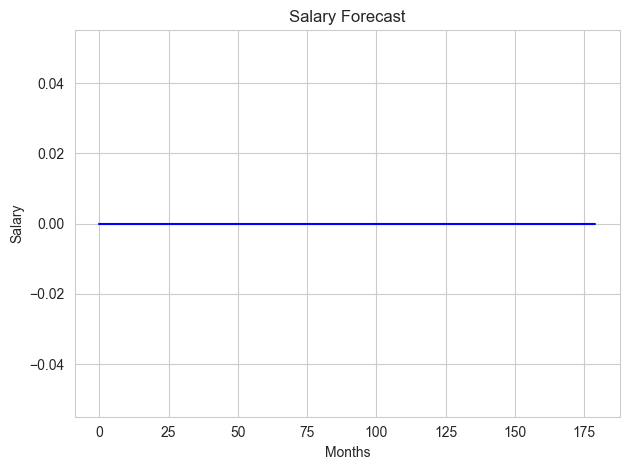

In [26]:
# Create monthly forecasts up to 15 years from now
forecast_months = 12*15
# Set your annual salary growth rate
annual_salary_growth = 0.05
# Calculate your equivalent monthly salary growth rate
monthly_salary_growth = (1+annual_salary_growth)**(1/12) - 1
# Forecast the cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))
# Calculate the actual salary forecast
salary_forecast = take_home_pay*cumulative_salary_growth_forecast
# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.xlabel("Months")
plt.ylabel("Salary")
plt.title("Salary Forecast")
plt.tight_layout()
plt.show()

**Forecast growing expenses due to inflation**

You will also assume your monthly expenses will rise by an average of 2.5% per year due to inflation. This will lead to higher cost of living over time, paying for the same expenses each year but at a higher price. Luckily, your salary is growing faster than inflation, which means you should have more money going into savings each month.

The `monthly_expenses` and `forecast_months` variables from the previous exercise are available.

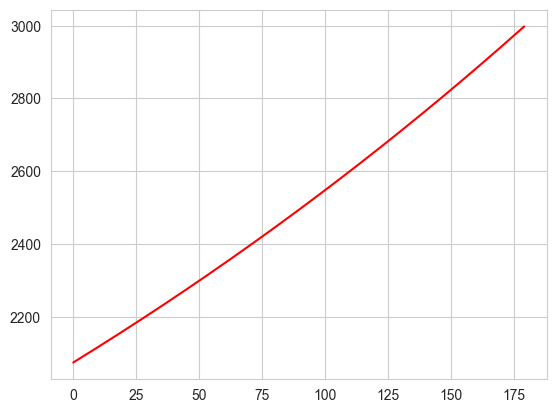

In [27]:
# Set the annual inflation rate
annual_inflation = 0.025

# Calculate the equivalent monthly inflation rate
monthly_inflation = (1+annual_inflation) **(1/12)-1

# Forecast cumulative inflation over time
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

# Calculate your forecasted expenses
expenses_forecast = monthly_expenses*cumulative_inflation_forecast

# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

### Net Worth and valuation in your finances



Now that you have forecasted your savings and salary over time while taking career progression and inflation into account, you have constructed a time-series which you can use to calculate your cash flows

For this example, all you need to do is subtract your forecasted monthly expenses from your forecasted monthly salary. The remaining cash flow will go straight into your savings account for each month. You want to project your cumulative savings over time to see how effective your budgeting process will be given your projections. `salary_forecast` and `expenses_forecast` from the previous exercises are available.

Your final net worth: -451438.16


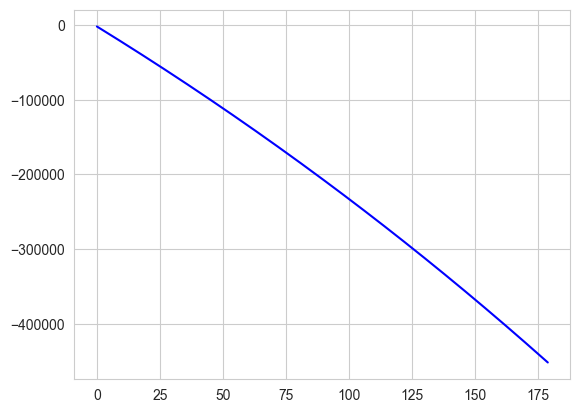

In [28]:
# Calculate your savings for each month
savings_forecast = salary_forecast - expenses_forecast

# Calculate your cumulative savings over time
cumulative_savings = np.cumsum(savings_forecast)

# Print the final cumulative savings after 15 years
final_net_worth = cumulative_savings[-1]
print(f"Your final net worth: {round(final_net_worth, 2)}")

# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()


In [29]:
# Set the annual investment return to 7%
investment_rate_annual = 0.07

# Calculate the monthly investment return
investment_rate_monthly = (1+investment_rate_annual)**(1/12)-1

# Calculate your required monthly investment to amass $1M
required_investment_monthly = npf.pmt(rate=investment_rate_monthly, nper=(15*12), pv=-1000000, fv=0)
print(F"You will have to invest ${round(required_investment_monthly, 2)} per month to amass $1M over 15 years")

You will have to invest $8868.5 per month to amass $1M over 15 years


This seems like a big number to invest every month to reach 1 million dollars in 15 years. What we can do is start slowly, investing a small percentage of your take-home income each month, which should grow over time as your income grows as well.

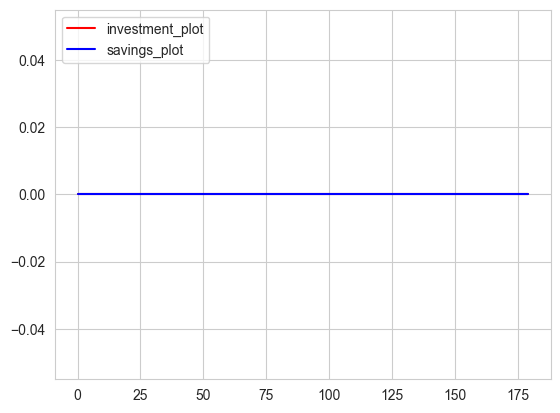

In [30]:
# Calculate your monthly deposit into your investment account
investment_deposit_forecast = salary_forecast * 0.3

# The rest goes into your savings account
savings_forecast_new = salary_forecast - investment_deposit_forecast

# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
plt.plot(investment_deposit_forecast, color='red')
plt.plot(savings_forecast_new, color='blue')
plt.legend(["investment_plot", "savings_plot"], loc=2)
plt.show()

To finish up our investment simulation, we will need to loop through each time period, calculate the growth of any investments you have already made, add your new monthly deposit, and calculate your net worth at each point in time.

In [31]:
def plot_investments(investment_portfolio, cumulative_savings, net_worth):
    # Plot your cumulative savings over time
    plt.plot(cumulative_savings, color='blue')
    # Plot the cumulative value of your investment portfolio over time
    plt.plot(investment_portfolio, color='red')
    plt.plot(net_worth, color='green')
    plt.legend(["savings_plot", "investment_plot"], loc=2)
    plt.show()

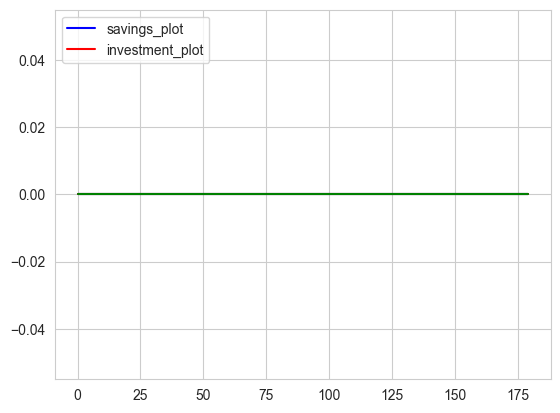

In [32]:
# Empty array to store your investment portfolio value over time
investment_portfolio = np.zeros(forecast_months)
net_worth = np.zeros(forecast_months)

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = cumulative_savings_new[i] + investment_portfolio[i]
         
# Plot your forecasted cumulative savings vs investments and net worth
plot_investments(investment_portfolio, cumulative_savings_new, net_worth)

**Inflation-adjusted net worth** </br> </br>
Lets see if what we have saved actually retains the same value. Our final networth that we calculated would have been **2,907,902.8**

In [33]:
# Set your future net worth
future_net_worth = net_worth[-1]

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over 15 years
inflation_adjusted_net_worth = npf.pv(rate=annual_inflation, nper=15, pmt=0, fv=-1*future_net_worth)
print(f"Your inflation-adjusted net worth: ${round(inflation_adjusted_net_worth, 2):,}")

Your inflation-adjusted net worth: $-0.0
